In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
combined = pd.read_csv("/Users/admin/Desktop/Y3S2/BT4222/combined.csv")

In [2]:
combined = combined.drop(combined.columns[0], axis=1)

In [3]:
combined.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27,6,8,0,-1.0,1.282130,103.786879,524.3,~-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27,6,8,0,-1.0,1.282130,103.786879,308.0,~-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27,6,8,0,-1.0,1.282130,103.786879,314.0,~-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27,6,8,2,-1.0,1.292047,103.768591,159.3,~-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11,3,2,0,-1.0,1.244208,103.827487,194.0,~01-05,0.173732


In [4]:
combined['floor_range'] = combined['floor_range'].str.replace('~', '')
combined.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27,6,8,0,-1.0,1.282130,103.786879,524.3,-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27,6,8,0,-1.0,1.282130,103.786879,308.0,-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27,6,8,0,-1.0,1.282130,103.786879,314.0,-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27,6,8,2,-1.0,1.292047,103.768591,159.3,-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11,3,2,0,-1.0,1.244208,103.827487,194.0,01-05,0.173732


In [5]:
street_mapping = pickle.load(open('/Users/admin/Downloads/street_mapping.pickle', 'rb'))
floor_mapping = pickle.load(open('/Users/admin/Downloads/floor_mapping.pickle', 'rb'))
property_mapping = pickle.load(open('/Users/admin/Downloads/property_mapping.pickle', 'rb'))

df = combined.copy()
df['street'] = df['street'].str.upper()
df['street'] = df['street'].map(street_mapping)
df['propertyType'] = df['propertyType'].map(property_mapping)
df['floor_range'] = df['floor_range'].map(floor_mapping)

## Descriptive Analysis

In [6]:
combined.describe()

,district,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,sentiment
count,133690.000000,133690.000000,1.336900e+05,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000
mean,18.176647,243.957049,9.659421e+05,32.917660,7.020226,10.229396,0.116344,123.908333,1.358712,103.845242,114.587490,0.118408
std,5.357858,5479.242737,1.630981e+06,9.410736,4.201369,5.571115,0.352231,58.367808,0.043492,0.068366,88.967348,0.062837
min,1.000000,2.580000,4.000000e+04,10.000000,1.000000,1.000000,0.000000,-1.000000,1.239641,103.687191,24.000000,-0.122276
25%,16.000000,67.170000,3.700000e+05,25.000000,4.000000,5.000000,0.000000,78.928571,1.325827,103.794725,84.000000,0.070124
50%,20.000000,80.330000,5.050000e+05,37.000000,5.000000,11.000000,0.000000,122.714286,1.355269,103.847709,102.000000,0.103255
75%,20.000000,93.420000,9.500000e+05,37.000000,11.000000,14.000000,0.000000,167.714286,1.389063,103.898665,121.000000,0.151736
max,28.000000,999973.000000,1.090000e+08,51.000000,16.000000,39.000000,2.000000,226.000000,1.460839,103.987293,4836.400000,0.822100


In [7]:
combined.dtypes

district              int64
street               object
propertyType         object
remaining_lease     float64
price               float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_area_sqm      float64
floor_range          object
sentiment           float64
dtype: object

In [8]:
combined['district'] = combined['district'].astype(str)

## Correlation Analysis
> Including Correlation Values

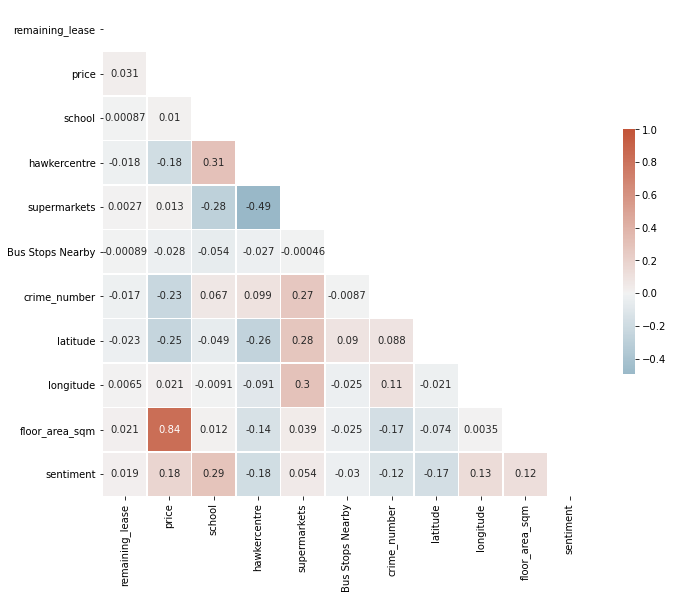

In [9]:
# correlation analysis
corr = combined.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
df.drop(['price'], axis=1, inplace=True)
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,2009,11,999.00,27,6,8,0,-1.0,1.282130,103.786879,524.3,0,0.380502
1,5,2009,11,999.00,27,6,8,0,-1.0,1.282130,103.786879,308.0,0,0.123495
2,5,2009,11,999.00,27,6,8,0,-1.0,1.282130,103.786879,314.0,0,0.123495
3,5,1324,15,999.00,27,6,8,2,-1.0,1.292047,103.768591,159.3,0,0.380502
4,4,376,6,85.25,11,3,2,0,-1.0,1.244208,103.827487,194.0,1,0.173732


In [12]:
output = calc_vif(df)
output

,variables,VIF
0,district,27.009035
1,street,3.931087
2,propertyType,5.175480
3,remaining_lease,1.003988
4,school,18.294814
5,hawkercentre,6.730058
6,supermarkets,7.415162
7,Bus Stops Nearby,1.131266
8,crime_number,6.981052
9,latitude,2003.362123


In [13]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)
calc_vif(df)

,variables,VIF
0,district,10.326751
1,street,3.468963
2,propertyType,4.643089
3,remaining_lease,1.003518
4,school,16.890151
5,hawkercentre,5.033443
6,supermarkets,6.910953
7,Bus Stops Nearby,1.119009
8,crime_number,6.801751
9,floor_area_sqm,3.270406


## Examining Number of Records in Each Category Pre Normalisation

> Bar Plots

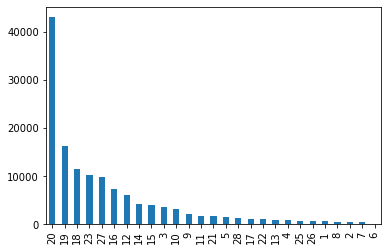

In [14]:
combined['district'].value_counts().plot(kind='bar')

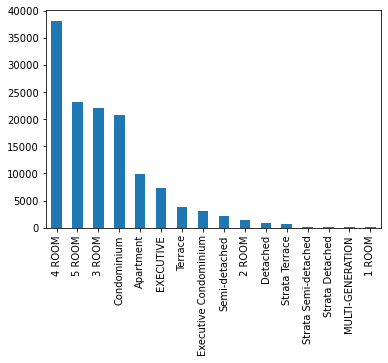

In [15]:
combined['propertyType'].value_counts().plot(kind='bar')

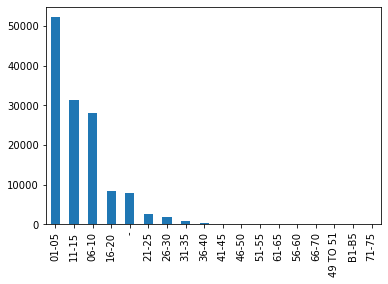

In [16]:
combined['floor_range'].value_counts().plot(kind='bar')

## Variation of Variables with Price

> Pairplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


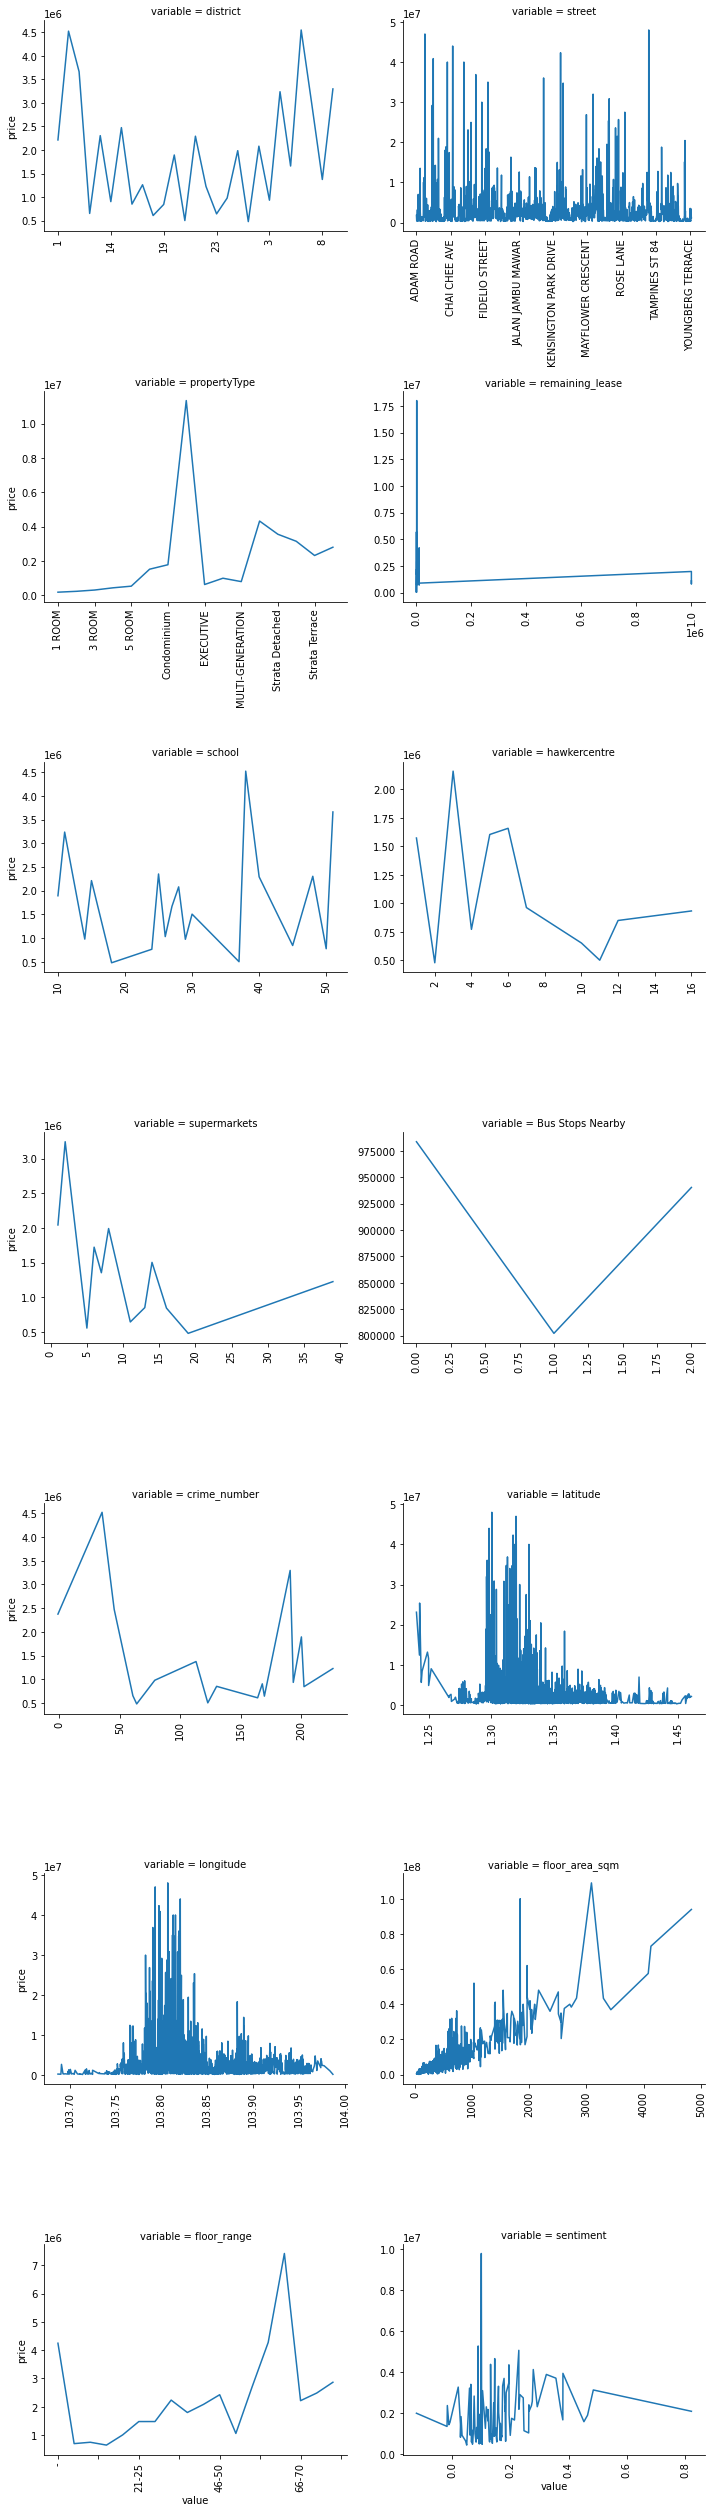

In [17]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
vals = ['district',            
'street',              
'propertyType',      
'remaining_lease',     
'school',             
'hawkercentre',        
'supermarkets',        
'Bus Stops Nearby',   
'crime_number',        
'latitude',           
'longitude',           
'floor_area_sqm',     
'floor_range',         
'sentiment']   
f = pd.melt(combined, id_vars=['price'], value_vars=vals)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "price")

> Scatterplot

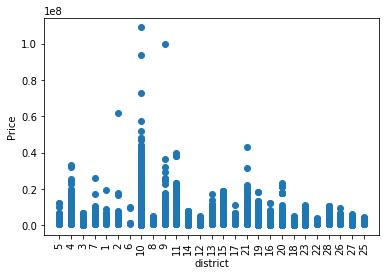

In [ ]:
for i in range(len(vals)):
    plt.scatter(combined[vals[i]],combined["price"])
    plt.ylabel("Price")
    plt.xlabel(vals[i]);
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
combined.columns

## Examining Categorical Variables against Price

> District

In [ ]:
combined.groupby('district').price.agg(pd.Series.median).plot.bar()

#sns.barplot(combined["district"],combined["price"])

> Property Type

In [ ]:
plt.figure(figsize=(10,5)) 
combined.groupby('propertyType').price.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["propertyType"],combined["price"])
plt.xticks(rotation=90)
plt.tight_layout()

> Schools Nearby

In [ ]:
combined.groupby('school').price.agg(pd.Series.median).plot.bar()

> Hawker Centres Nearby

In [ ]:
combined.groupby('hawkercentre').price.agg(pd.Series.median).plot.bar()

In [ ]:
combined.groupby('floor_range').price.agg(pd.Series.median).plot.bar()
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
combined.groupby('supermarkets').price.agg(pd.Series.median).plot.bar()

## Examine Number of Crimes within Districts

In [ ]:
combined.groupby('district').crime_number.agg(pd.Series.median).plot.bar()

## Examining the Types of Properties amongst Districts

In [ ]:
#sns.countplot(combined["district"],hue = combined["propertyType"])
plt.figure(figsize=(200,100)) 

combined.groupby('district').propertyType.value_counts().unstack(0).plot(kind='bar', stacked= True)
plt.legend(loc="upper right", ncol=len(combined.columns)-1)


## Overall Sentiment Per District

In [ ]:
combined.groupby('district').sentiment.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["sentiment"])

## Supermarkets in each district

> Number of Supermarkets in all districts the same? might need to check data cleaning

In [ ]:
combined.groupby('district').supermarkets.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["supermarkets"])

## Hawkercentres Per District

In [ ]:
combined.groupby('district').hawkercentre.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["hawkercentre"])

## Schools Per District

In [ ]:
combined.groupby('district').school.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["school"])

## Floor Area Per District

In [ ]:
combined.groupby('district').floor_area_sqm.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"], combined["floor_area_sqm"])

## Remaining Lease Per District

In [ ]:
combined.groupby('district').remaining_lease.agg(pd.Series.median).plot.bar()